In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier file')

cap = cv2.VideoCapture('people_footage.mp4')

In [19]:
scaling_factor = 0.5
x=0
while True:
    x,frame = cap.read()
    frame = cv2.resize(frame,None,
                       fx=scaling_factor,fy=scaling_factor,
                       interpolation=cv2.INTER_AREA)
    print(frame)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    face_rects = face_cascade.detectMultiScale(gray,1.3,5)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    cv2.imshow('Face detector', frame)
    
    c=cv2.waitKey(1)
    if c==-1 and x==1:
        break
    x+=1     
cap.release()
cv2.destroyAllWindows()

[[[239 242 242]
  [241 244 244]
  [240 243 243]
  ...
  [250 246 249]
  [250 246 249]
  [250 246 249]]

 [[239 242 242]
  [241 244 244]
  [240 243 243]
  ...
  [251 247 250]
  [251 247 250]
  [251 247 250]]

 [[240 243 243]
  [241 244 244]
  [240 243 243]
  ...
  [247 246 248]
  [247 246 248]
  [247 246 248]]

 ...

 [[102 112 138]
  [100 110 136]
  [ 97 107 133]
  ...
  [123  95  87]
  [119  94  85]
  [121  98  89]]

 [[101 107 136]
  [ 97 103 132]
  [ 96 103 130]
  ...
  [112  89  80]
  [112  89  80]
  [114  91  82]]

 [[ 99 105 134]
  [ 96 102 131]
  [ 93 100 127]
  ...
  [119  96  87]
  [120  97  88]
  [115  92  83]]]
[[[239 242 242]
  [241 244 244]
  [240 243 243]
  ...
  [250 246 249]
  [250 246 249]
  [250 246 249]]

 [[239 242 242]
  [241 244 244]
  [240 243 243]
  ...
  [251 247 250]
  [251 247 250]
  [251 247 250]]

 [[240 243 243]
  [241 244 244]
  [240 243 243]
  ...
  [247 246 248]
  [247 246 248]
  [247 246 248]]

 ...

 [[104 110 139]
  [103 109 138]
  [100 106 135]
  ..

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread("/content/drive/MyDrive/cv/1face17.jpeg")

In [16]:
img.shape


(1152, 648, 3)

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
img_gray.shape

(1152, 648)

In [20]:
#load the classifier

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [21]:
#Perform the Face Detection

face = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [22]:
#now we will draw a rectangular bounding box around the face

for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 1)     #4 is the thickness of the boundary of the bounding box

In [23]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 647.5, 1151.5, -0.5)

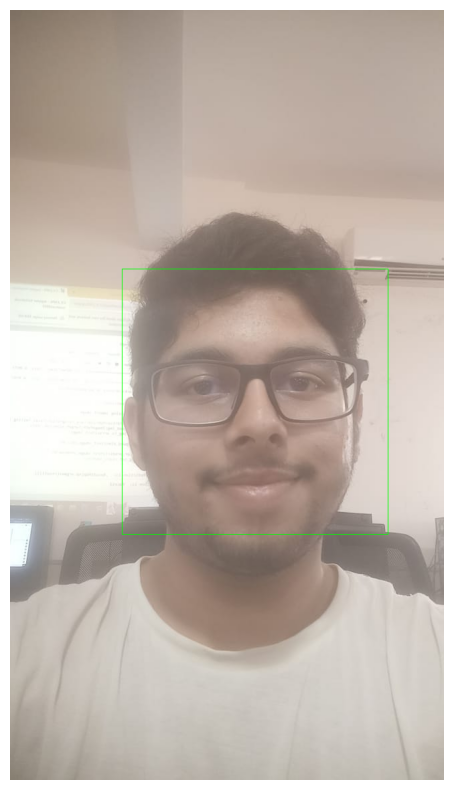

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

#**Face** Recognition

In [25]:
trainingImagePath = '/content/drive/MyDrive/cv/Face Images/Final Training Images'
testImagePath = '/content/drive/MyDrive/cv/Face Images/Final Testing Images'

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [28]:
#we wont apply any pre processimg on the raw images of the test dataset

test_datagen = ImageDataGenerator()

In [29]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 254 images belonging to 17 classes.


In [30]:

# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 75 images belonging to 17 classes.


In [31]:
# Printing class labels for each face
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [32]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}

 The Number of output neurons:  17


In [33]:
# so in our CNN model we would have:
#2 hideen convolutional layers
#2 hidden pooling layers
#16 neurons in the output layer since we have 17 classes
# and 1 flattening layer

In [34]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [35]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

''' ADDITIONAL LAYER of CONVOLUTION for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

''' STEP--3 FLattening'''
classifier.add(Flatten())

'''STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



# Starting the model training
classifier.fit(
    training_set,
    steps_per_epoch=8,         #number of steps per epoch = (Total number of training samples / Batch size), here i have 244 training images and the batch size is 32, therefore the steps_per_epochs comes out to be 7.6 = 8
    epochs=15,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 88.5653 - accuracy: 0.0551

8/8 [==============================] - 68s 8s/step - loss: 88.5653 - accuracy: 0.0551 - val_loss: 7.1919 - val_accuracy: 0.0267
Epoch 2/15
8/8 [==============================] - 5s 568ms/step - loss: 3.8731 - accuracy: 0.0709
Epoch 3/15
8/8 [==============================] - 4s 418ms/step - loss: 2.7901 - accuracy: 0.1181
Epoch 4/15
8/8 [==============================] - 4s 446ms/step - loss: 2.5769 - accuracy: 0.2323
Epoch 5/15
8/8 [==============================] - 4s 549ms/step - loss: 1.8182 - accuracy: 0.4882
Epoch 6/15
8/8 [==============================] - 5s 504ms/step - loss: 0.8900 - accuracy: 0.7598
Epoch 7/15
8/8 [==============================] - 5s 550ms/step - loss: 0.5816 - accuracy: 0.8189
Epoch 8/15
8/8 [==============================] - 9s 1s/step - loss: 0.3476 - accuracy: 0.9094
Epoch 9/15
8/8 [==============================] - 6s 569ms/step - loss: 0.1700 - accuracy: 0.9528
Epoch 10/15
8/8 [==============================] - 4s 485ms/step - loss: 0.1571 - accuracy:

In [40]:
'''Making single predictions'''
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/cv/WhatsApp Image 2024-04-17 at 3.30.43 PM.jpeg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face17


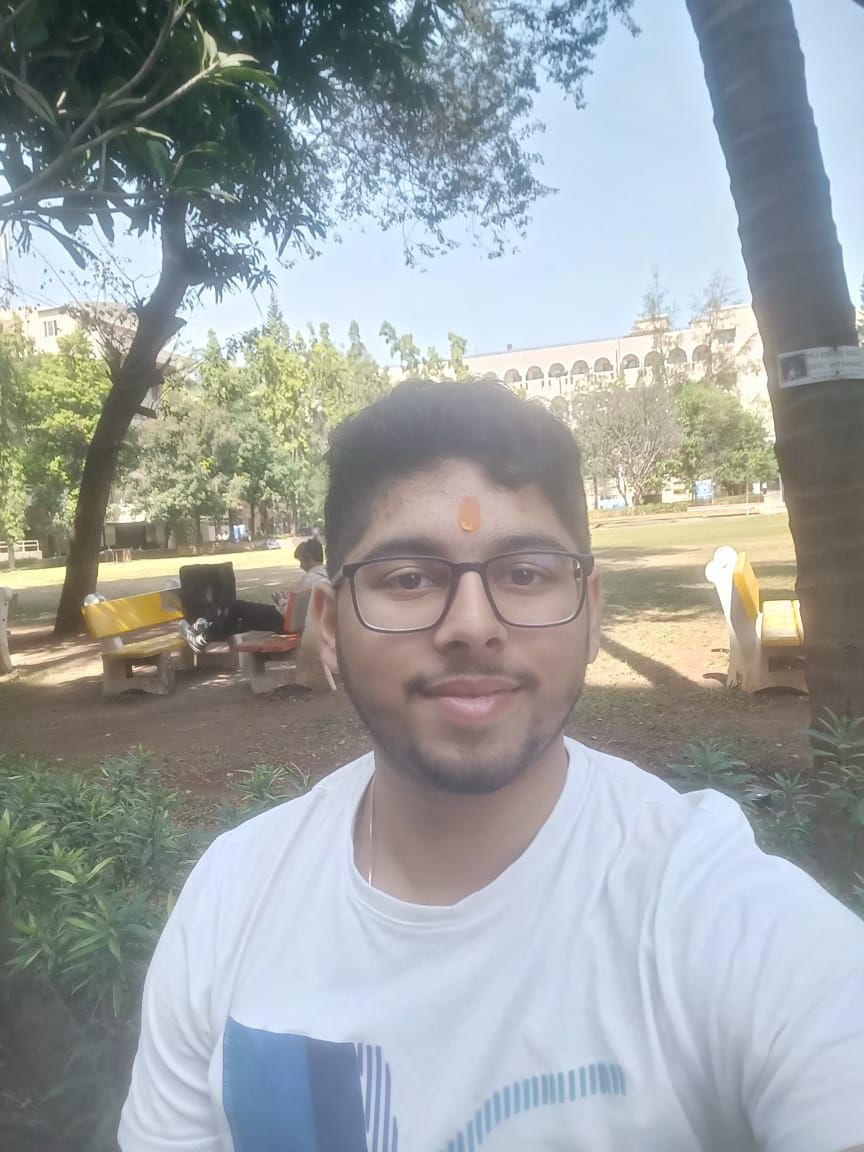

In [47]:
from google.colab.patches import cv2_imshow
import cv2

imge = cv2.imread('/content/drive/MyDrive/cv/WhatsApp Image 2024-04-17 at 3.30.43 PM.jpeg')
cv2_imshow(imge)